In [258]:
% pylab inline
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


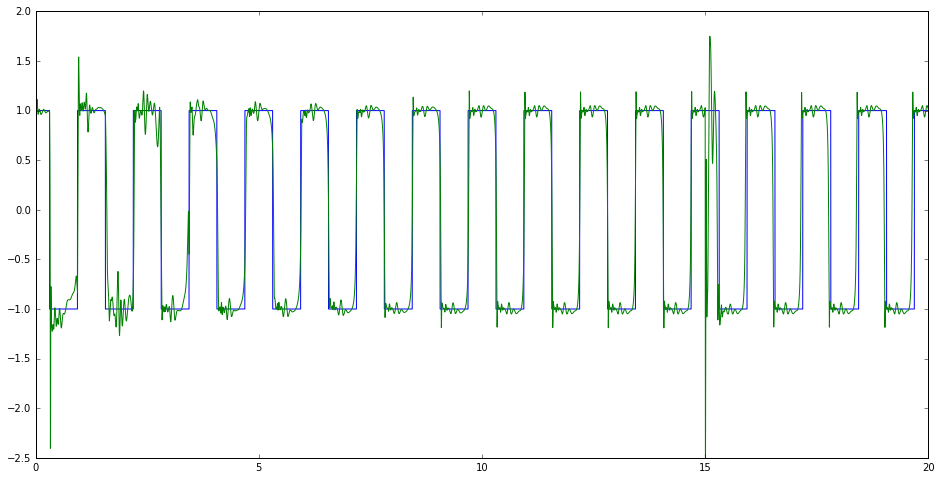

In [308]:
random.seed(0)
tau  = 0.01
N_G  = 200
p_GG = 0.1
p_z  = 1
g_Gz = 0.5
g_GG = 1.5
a    = 1.0

J_GG = randn(N_G,N_G)*(rand(N_G,N_G)<=p_GG)/sqrt(p_GG*N_G)
J_Gz = 2*rand(N_G,1) - 1

T_end = 20.0
dt = tau/4.
t = arange(0,T_end,dt)
num_iters = len(t);

# Setup the function
f0 = 1/(T_end/4)
f = cos(2*pi*4*f0*t)*sin(2*pi*2*f0*t)
f = 2*(cos(2*pi*4*f0*t)>=0)-1
# f = cumsum(f)*dt

x_hist = randn(N_G,num_iters);
dw_hist = 0*x_hist
z_hist = zeros(shape=(1,num_iters))

w = randn(N_G,1)/sqrt(N_G)
x = randn(N_G,1)
P = eye(N_G)/a

for i in tqdm(range(num_iters)):
    r = tanh(x)
    z = dot(w.T,r)
    x_hist[:,i:i+1]=x
    z_hist[0,i] = z
    dxdt = (-x + g_GG*dot(J_GG,r) + g_Gz*J_Gz*z)/tau
    x = x + dxdt*dt
    
    # Only learn for the first half of the iterations
    if i<num_iters/2:
        e_m = z - f[i]
        Pr = dot(P,r)
        dP = -dot(Pr,Pr.T)/(1 + dot(r.T,Pr))
        P = P + dP
        dw = - e_m*dot(P,r)
        w = w + dw
        dw_hist[:,i:i+1] = dw
    
    # 3/4 of the way through, restart with new initial conditions
    if i == int(round(0.75*num_iters)):
        x = randn(N_G,1)

r_hist = tanh(x_hist)
dw_hist_norm = sqrt(sum(dw_hist**2,axis=0))

figure(figsize=(16,8))
plot(t,f)
plot(t,z_hist[0,:]);

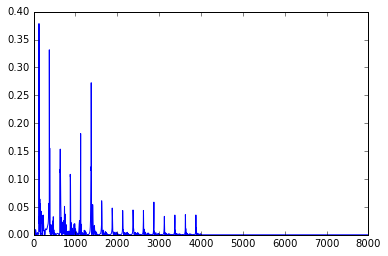

In [260]:
plot(dw_hist_norm)

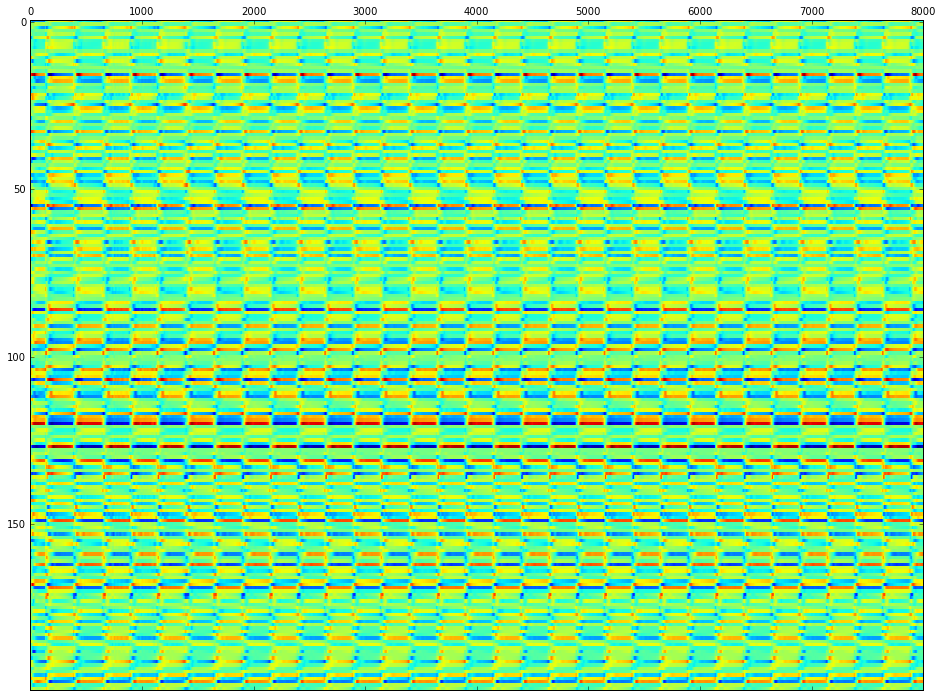

In [307]:
fig = figure(figsize=(16,12))
matshow(x_hist, fignum=False)
axis('normal')
axis('tight');

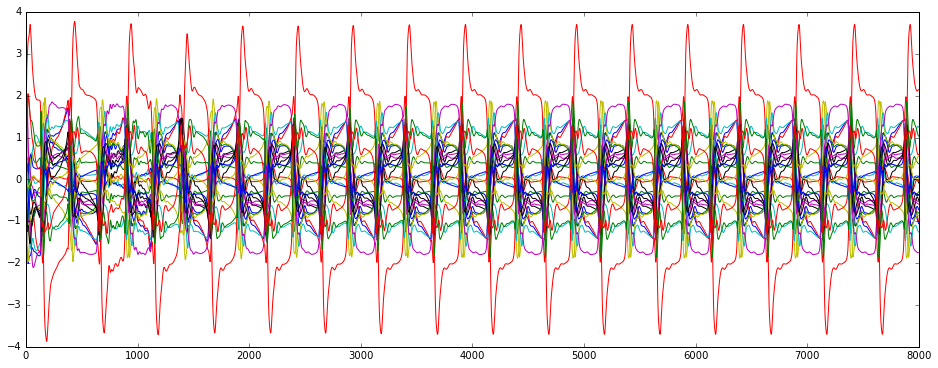

In [262]:
figure(figsize=(16,6))
plot(x_hist[range(24),:].T);

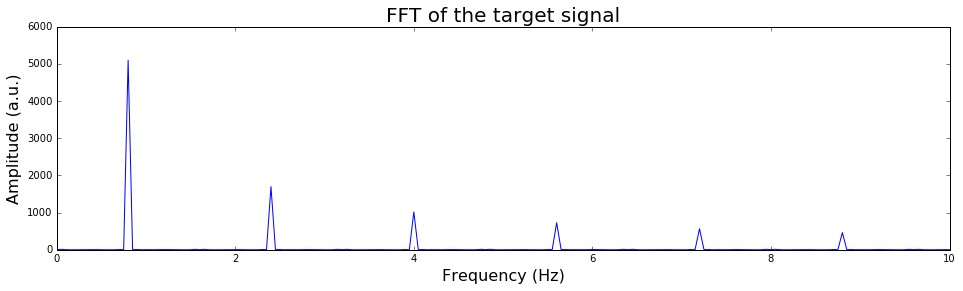

In [290]:
ff = fft.fft(f)
freqs = [float(a)/len(ff)/dt for a in range(len(ff))]
figure(figsize=(16,4))
plot(freqs,abs(ff));
xlim([0,10]);
xlabel('Frequency (Hz)',fontsize=16)
ylabel('Amplitude (a.u.)',fontsize=16)
title('FFT of the target signal',fontsize=20);

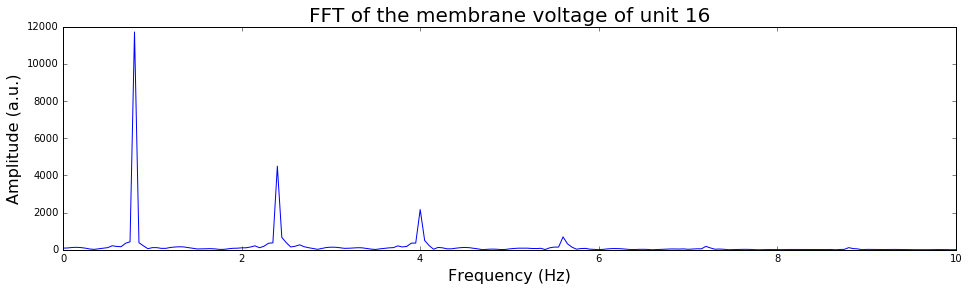

In [302]:
which_unit = 16
ff = fft.fft(x_hist[which_unit,:])
freqs = [float(a)/len(ff)/dt for a in range(len(ff))]
figure(figsize=(16,4))
plot(freqs,abs(ff));
xlim([0,10]);
xlabel('Frequency (Hz)',fontsize=16)
ylabel('Amplitude (a.u.)',fontsize=16)
title('FFT of the membrane voltage of unit {}'.format(which_unit),fontsize=20);